In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy

In [4]:
import sys

sys.path.append('/home/ewout/enem_atp/')
from util import load_sample, load_acertos,provas,score_inep,load_padr,item_info_inep, params_inep, scalecalparams
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Como funciona TRI
A teoria de resposta ao item é uma metodologia para calcular notas a partir de padrões de respostas a "itens" (questões). Vamos começar com um exemplo, carregando uma amostra de alguns dos milhões de candidatos que fizeram a prova de 2023.

```{info}
Para este projeto baixamos [os microdados do ENEM](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados) disponibilizados pelo INEP. Para ver o nosso *pipeline* de processamento de dados e as funções que usamos abaixo, veja o nosso repositório de código: https://github.com/atp/enem
```


In [6]:
load_sample(2023,5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
13488,210058450397,2023,2,F,1,4,1,2,0,3,...,B,A,A,B,A,A,E,A,C,B
19989,210061475266,2023,4,M,1,3,1,1,1,1,...,A,A,A,B,A,A,B,A,A,A
19921,210061291899,2023,3,F,0,1,1,2,0,2,...,B,A,B,B,A,B,E,A,C,B
20494,210058900616,2023,9,M,1,3,1,1,7,1,...,A,A,A,B,A,B,D,A,A,B
1348,210059180151,2023,2,F,1,1,1,2,0,2,...,B,A,A,B,A,B,E,B,A,B


Vemos que para cada candidato há informaçoes contextuais (autoreportado, na hora de fazer a inscrição do ENEM) sobre idade, sexo, cor/raça e outros variáveis. Nesta base também constam os padrões de resposta e a nota ENEM determinado pelo INEP. Transformamos estes dados numa outra tabela para facilitar as análises que vamos fazer:

In [7]:
load_acertos(2023,'CN',5)

,40724,60332,126604,117631,43890,85436,26042,83558,64023,87989,...,111665,84422,83378,117887,66330,48492,63155,acertos,caderno,nota_inep
candidato,,,,,,,,,,,,,,,,,,,,,
210061850009,0,0,1,1,0,0,0,0,1,0,...,1,1,1,0,0,0,0,16,1221,569.0
210060270251,1,0,1,1,0,0,0,1,0,0,...,1,1,1,0,0,0,0,11,1223,521.7
210060574698,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,11,1224,470.7
210061157645,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,8,1223,442.5
210059803518,1,0,1,1,0,0,0,1,1,1,...,0,1,1,0,0,1,1,19,1222,580.9


## A nota TRI é bem diferente do que o número de acertos
Primeiro, mostramos o que todo mundo que já fez o ENEM sabe: dois candidatos com o mesmo número de acertos podem ter notas ENEM bem diferentes. Não é somente o número de acertos que conta, é também o padrão de respostas que é levado em conta:

<AxesSubplot:xlabel='acertos', ylabel='nota_inep'>

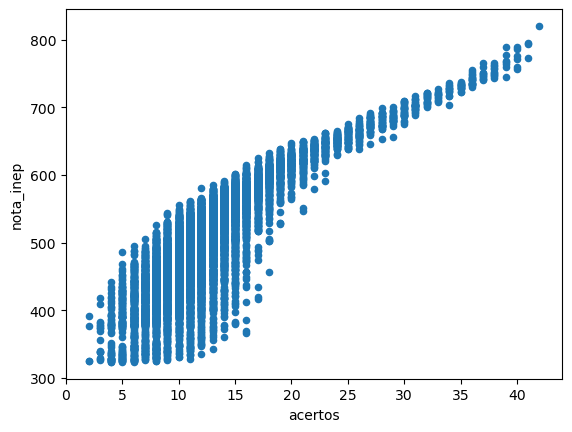

In [8]:
df = load_acertos(2023,'CN',10000)
df.plot(kind='scatter',x='acertos',y='nota_inep')